In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../Data/PublicationsWAddresses.csv')

In [ ]:
df["Country"].unique()
### The following is built using the code from Markus and Daria. Thank you guys! ###

array(['Germany', 'Belgium', 'Denmark', 'Switzerland', 'Poland', 'UK',
       'Norway', 'Australia', 'Finland', 'Netherlands', 'India',
       'Ethiopia', 'China', 'USA', 'France', 'United Arab Emirates',
       'Qatar', 'Egypt', 'Hungary', 'Greece', 'New Zealand', 'Austria',
       'Spain', 'Romania', 'Israel', 'Turkey', 'Sweden', 'Italy',
       'Canada ', 'South Africa', 'Canada', 'Czechia', 'Bangladesh',
       'Ireland', 'Mexico', 'Estonia', 'Serbia', 'Brazil', 'South Korea',
       'Algeria', 'Japan', 'Portugal', 'Scotland', 'Denmark ', 'Russia',
       'Iran', 'Ecuador', 'Morocco', 'Slovenia', 'Luxembourg', 'Uganda',
       'Tunisia', 'Namibia', 'Singapore', 'Colombia', 'Mongolia',
       'Iceland', 'Slovakia', 'Denmark\u200b', 'Denmark.', 'Sudan',
       'Hong Kong', 'Paraguay', 'Argentina', 'Chile', 'Costa Rica',
       'Ghana', 'Liechtenstein', 'Malta', 'Nigeria', 'Croatia'],
      dtype=object)

In [4]:
nordic = ["Denmark", "Sweden", "Norway", "Finland"]
european = ['Germany', 'Belgium', 'Switzerland', 'Poland', 'UK', 'Netherlands',
                      'France', 'Hungary', 'Greece', 'Austria', 'Spain', 'Romania',
                      'Turkey', 'Italy', 'Czechia', 'Ireland', 'Estonia', 'Serbia',
                      'Portugal', 'Scotland', 'Russia', 'Slovenia', 'Luxembourg',
                      'Slovakia', 'Liechtenstein', 'Malta', 'Croatia']

# I have optionally added USA. But it can also be included in International and the results remain interesting.
df["Region"] = np.select(
    [
        df["Country"].isin(nordic),          # Condition for Nordic countries
        df["Country"].isin(european) & ~df["Country"].isin(nordic),  # Non-Nordic European countries
        df["Country"] == "USA"
    ],
    [
        "Nordic",                # Value if the condition is True
        "Non-Nordic Europe",    # Value if the second condition is True
        "USA"
    ],
    default="International"      # Value if no conditions are True
)
df.head()

,Institution,Year,Title,Business IT,Computer Science,Digital Design,Address,Country,Region
0,3DInteractive,2016,How Good Is Multi-Pivot Quicksort?,0,1,0,"Am Vogelherd 10, 98693 Ilmenau, Germany",Germany,Non-Nordic Europe
1,"4Brain, Department of Neurology, Ghent Univers...",2021,Feasibility of transcutaneous auricular vagus ...,1,0,0,"Corneel Heymanslaan 10, 9000 Gent, Belgium",Belgium,Non-Nordic Europe
2,A.P. Møller - Mærsk A/S,2024,Difficulty Modelling in Mobile Puzzle Games: A...,0,0,1,"Esplanaden 50, 1098 København K",Denmark,Nordic
3,AAL Association,2017,Documenting emerging practices incl appendices,0,0,1,"Rdpt Robert Schuman 2, 1040 Bruxelles, Belgium",Belgium,Non-Nordic Europe
4,ABB,2012,"Interaction with the dirty, dangerous, and dull",0,0,1,"Zürich, Switzerland",Switzerland,Non-Nordic Europe


In [5]:
def plot_cumulative_publications(df, years, top_n=10):
    """
    Plots the cumulative number of publications for the top N countries up to each year.

    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year of publication' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on cumulative publications.
    """
    # Ensure 'Year of publication' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Region']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Region', values='Publications').fillna(0)

    # Sort the pivot table by year to ensure correct cumulative sum
    pivot_df = pivot_df.sort_index()

    # Compute the cumulative sum over the years
    cumulative_df = pivot_df.cumsum()

    # Select the top N countries based on the latest cumulative counts
    top_countries = cumulative_df.iloc[-1].nlargest(top_n).index

    # Filter the cumulative dataframe to include only the top N countries
    cumulative_top_df = cumulative_df[top_countries]

    # Plotting
    plt.figure(figsize=(14, 8))
    
    for country in top_countries:
        plt.plot(cumulative_top_df.index, cumulative_top_df[country], marker='o', label=country)
    
    plt.title('Cumulative Publications by Regions Over Time', fontsize=16)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Cumulative Number of Publications', fontsize=14)
    plt.legend(title='Region', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

In [6]:
def plot_publications(df, years):
    """
    Plots the number of publications per year for the three different regions.

    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year of publication' and 'Region' columns.
    - years (list or range): The list of years to include in the plot.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Region']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Region', values='Publications').fillna(0)

    print("Pivot DataFrame:\n",pivot_df)
    # Select the top N countries based on total publications
    regions = list(pivot_df.columns)

    # Plotting
    plt.figure(figsize=(14, 8))
    
    for region in regions:
        plt.plot(pivot_df.index, pivot_df[region], marker='o', label=region)
    
    plt.title('Number of Publications by Different Regions Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Publications', fontsize=14)
    plt.legend(title='Country', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='trailing'):
    """
    Plots the smoothed number of publications per year for the top N countries using different smoothing methods.

    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - window (int): The window size for the moving average smoothing.
    - smoothing (str): The smoothing method to use: 'trailing', 'centered', or 'gaussian'.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Region']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Region', values='Publications').fillna(0)

    # Apply smoothing based on the specified method
    if smoothing == 'trailing':
        smoothed_df = pivot_df.rolling(window=window, min_periods=1).mean()
    elif smoothing == 'centered':
        smoothed_df = pivot_df.rolling(window=window, min_periods=1, center=True).mean()
    elif smoothing == 'gaussian':
        smoothed_df = pivot_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
    else:
        raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

    # Plotting
    plt.figure(figsize=(14, 8))
    regions = list(pivot_df.columns)
    
    for region in regions:
        plt.plot(smoothed_df.index, smoothed_df[country], marker='o', label=country)
    
    plt.title(f'Smoothed Number of Publications by Top Countries Over Time ({smoothing.capitalize()} Smoothing)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Publications', fontsize=14)
    plt.legend(title='Country', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

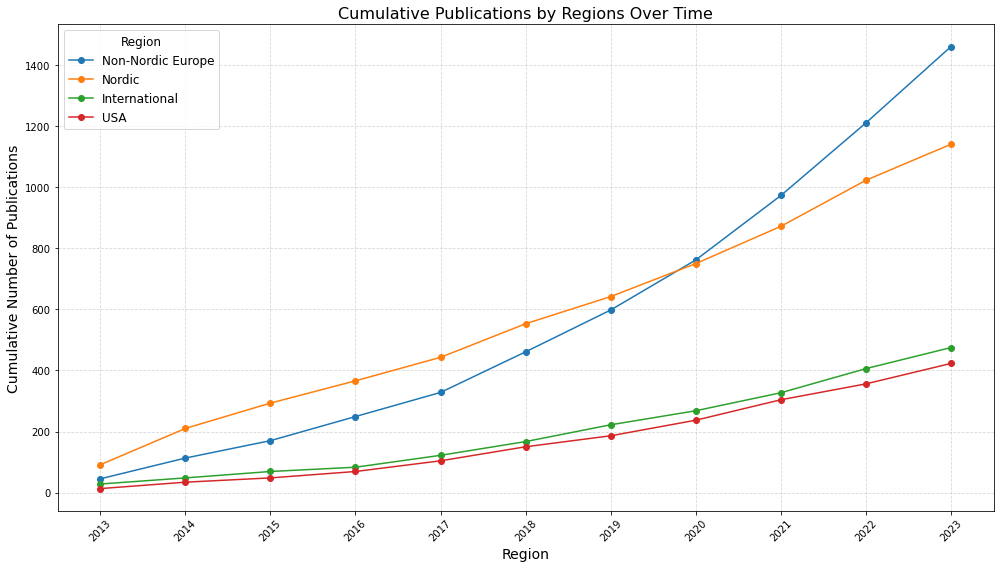

In [7]:
years = list(range(2013, 2024))
a = plot_cumulative_publications(df, years, top_n=10)

Pivot DataFrame:
 Region  International  Non-Nordic Europe  Nordic  USA
Year                                                 
2013               28                 45      91   13
2014               20                 68     119   21
2015               21                 57      83   14
2016               14                 79      73   21
2017               39                 79      77   35
2018               45                133     110   46
2019               55                137      89   36
2020               46                164     108   51
2021               59                211     122   67
2022               79                238     151   52
2023               69                250     118   67


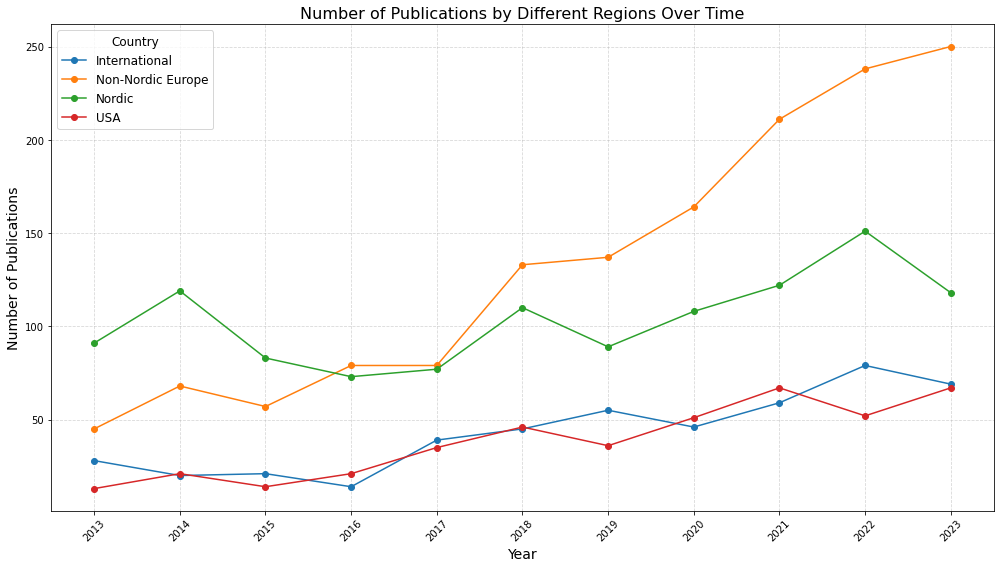

In [8]:
plot_publications(df, years)